In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np
from tensorflow import keras
%matplotlib inline

In [2]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.regularizers import l1,l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [3]:
dataset1 = pd.read_csv("setapProcessT1.csv")
dataset1['SE Process grade'].replace(to_replace=["A","F"], value=["1","2"],inplace=True)
dataset1.head()

,teamMemberCount,femaleTeamMembersPercent,teamLeadGender,teamDistribution,teamMemberResponseCount,meetingHoursTotal,meetingHoursAverage,meetingHoursStandardDeviation,inPersonMeetingHoursTotal,inPersonMeetingHoursAverage,...,standardDeviationUniqueCommitMessagePercentByWeek,averageCommitMessageLengthTotalByWeek,standardDeviationCommitMessageLengthTotalByWeek,averageCommitCountByStudent,standardDeviationCommitCountByStudent,averageUniqueCommitMessageCountByStudent,issueCount,onTimeIssueCount,lateIssueCount,SE Process grade
0,3,0.0000,0,1,1,2.000000,2.000000,0.000000,2.000000,2.000000,...,0.0,57.0,0.0,4.0,0.0,3.0,2,2,0,2
1,3,0.3333,1,1,3,9.714286,3.238095,3.299832,6.285715,2.095238,...,0.0,127.0,0.0,4.0,0.0,3.0,2,2,0,1
2,4,0.0000,0,1,3,4.000000,1.333333,0.471405,3.428572,1.142857,...,0.0,0.0,0.0,7.0,0.0,1.0,1,1,0,2
3,6,0.0000,0,0,1,2.000000,2.000000,0.000000,1.000000,1.000000,...,0.0,45.0,0.0,2.0,0.0,2.0,0,0,0,1
4,6,0.1667,0,0,3,11.000000,3.666667,1.699673,5.000000,1.666667,...,0.0,13.0,0.0,1.0,0.0,1.0,0,0,0,1


In [4]:
train = dataset1.loc[0:44]
Xtrain = train.iloc[:,0:84]
Ytrain = train.iloc[:,84]
test = dataset1.loc[45:64]
Xtest = test.iloc[:,0:84]
Ytest = test.iloc[:,84]

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(Xtrain)
y_train = Ytrain.values.reshape(-1,1)
y_train = scaler.fit_transform(y_train)

X_test = scaler.fit_transform(Xtest)
y_test = Ytest.values.reshape(-1,1)
y_test = scaler.fit_transform(y_test)

In [6]:
model = Sequential()
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='linear'))
model.add(Dense(1,))
model.compile(Adam(lr=0.003), loss='mse', metrics=['mae','mse'])

In [7]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

In [8]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=50, validation_split = 0.2,shuffle = True, verbose = 1, 
                    callbacks = [earlystopper])

Train on 36 samples, validate on 9 samples
Epoch 1/40
36/36 [==============================] - 1s 15ms/step - loss: 5.7763 - mae: 1.9554 - mse: 5.7493 - val_loss: 1.4180 - val_mae: 1.0072 - val_mse: 1.3911
Epoch 2/40
36/36 [==============================] - 0s 222us/step - loss: 4.3510 - mae: 1.7386 - mse: 4.3241 - val_loss: 1.4606 - val_mae: 1.0462 - val_mse: 1.4337
Epoch 3/40
36/36 [==============================] - 0s 222us/step - loss: 3.6539 - mae: 1.5644 - mse: 3.6271 - val_loss: 1.5145 - val_mae: 1.0832 - val_mse: 1.4876
Epoch 4/40
36/36 [==============================] - 0s 278us/step - loss: 2.6711 - mae: 1.3255 - mse: 2.6442 - val_loss: 1.5541 - val_mae: 1.1081 - val_mse: 1.5273
Epoch 5/40
36/36 [==============================] - 0s 194us/step - loss: 2.3008 - mae: 1.2636 - mse: 2.2739 - val_loss: 1.5820 - val_mae: 1.1236 - val_mse: 1.5552
Epoch 6/40
36/36 [==============================] - 0s 250us/step - loss: 1.8138 - mae: 1.0495 - mse: 1.7870 - val_loss: 1.6133 - val_mae:

In [9]:
y_test_pred = model.predict(X_test)

In [10]:
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Test set is:	-0.699


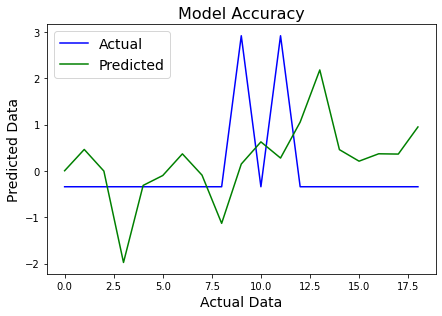

In [11]:
plt.plot(y_test,'b',label='Actual')
plt.plot(y_test_pred,'g',label='Predicted')
plt.legend(fontsize=14)
plt.tight_layout()
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Actual Data', fontsize=14)
plt.ylabel('Predicted Data', fontsize=14)
plt.savefig('Prediction1WithoutAnything', dpi=400, bbox_inches = 'tight')

In [12]:
pred = scaler.inverse_transform(y_test_pred)

In [13]:
prediction = pd.DataFrame(pred, columns=['predictions']).to_csv('PredictionTest.csv')

In [14]:
model.evaluate(X_test,y_test)

19/19 [==============================] - 0s 158us/step


[1.725542664527893, 1.0259259939193726, 1.698866844177246]